## Finding a Good Location for a Gourmet Pizza Place in Cuyahoga County

### Introduction/Business Problem

Basilico Pizzeria, a local gourmet pizza chain in the Cleveland, Ohio area, wants to open 2 new restaurants. 
They want to open them in cities without a lot of competition and where the population and median income are high enough to support the business.

In [38]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### I obtained a download of latitude and longitude for all US cities at the following location: https://simplemaps.com/data/us-cities. I removed the non-Ohio locations and uploaded the CSV. See header below.

In [39]:
df1 = pd.read_csv('OHcities.csv')
df1.head()

,city,county,lat,lng,population
0,Dunkinsville,Adams,38.8559,-83.4713,NaN
1,Cherry Fork,Adams,38.8862,-83.6146,155.0
2,Peebles,Adams,38.9463,-83.4094,1753.0
3,West Union,Adams,38.7917,-83.5441,3074.0
4,Manchester,Adams,38.6902,-83.6053,1978.0


#### I next obtained Ohio median income data from the following website and converted it to a CSV and uploaded it.  https://www.cleveland.com/datacentral/2016/12/median_family_income_household.html. See header below.

In [40]:
df2 = pd.read_csv('OHcities_Income.csv')
df2.head()

,city,median_income
0,New Albany,"$214,850"
1,Indian Hill,"$211,795"
2,Pepper Pike,"$186,765"
3,Powell,"$146,442"
4,Dublin,"$144,005"


#### Next, merge the dataframes.

In [41]:
df=df1.merge(df2)
df['median_income'] = df['median_income'].str.replace('$', '')
df['median_income'] = df['median_income'].str.replace(',', '')
df['median_income'] = df['median_income'].astype(float)

#### Filter dataframe to include only cities in Cuyahoga County.

In [42]:
dfcuyahoga=df[df['county'].str.contains("Cuyahoga")]
dfcuyahoga = dfcuyahoga.reset_index(drop=True)
dfcuyahoga.to_csv('c:\dfcuyahoga.csv', index=False)
dfcuyahoga.head()

,city,county,lat,lng,population,median_income
0,University Heights,Cuyahoga,41.4948,-81.5348,13126.0,84594.0
1,Lakewood,Cuyahoga,41.4824,-81.8008,50279.0,70448.0
2,Richmond Heights,Cuyahoga,41.5589,-81.5029,10421.0,63029.0
3,Shaker Heights,Cuyahoga,41.4744,-81.5496,27448.0,107938.0
4,Brecksville,Cuyahoga,41.3079,-81.6193,13425.0,121974.0


#### Get summary statistics

In [43]:
dfcuyahoga.describe()

,lat,lng,population,median_income
count,38.000000,38.000000,3.800000e+01,38.000000
mean,41.437532,-81.661145,6.702603e+04,80272.473684
std,0.073068,0.157642,2.777285e+05,30601.103512
min,41.307900,-81.931500,6.198000e+03,30466.000000
25%,41.384750,-81.811450,1.278025e+04,58252.750000
50%,41.435600,-81.628900,1.871100e+04,76732.500000
75%,41.484425,-81.522775,2.779075e+04,102062.750000
max,41.590400,-81.440100,1.731637e+06,186765.000000


#### We will use the population and median income statistics as a factor in our decision making. Particularly we will be looking for population and median income near the 75 percentile.

#### Remove population and median income before clustering

In [44]:
dfcuyahoga1=dfcuyahoga.drop(columns=['population', 'median_income'])
dfcuyahoga1.head()

,city,county,lat,lng
0,University Heights,Cuyahoga,41.4948,-81.5348
1,Lakewood,Cuyahoga,41.4824,-81.8008
2,Richmond Heights,Cuyahoga,41.5589,-81.5029
3,Shaker Heights,Cuyahoga,41.4744,-81.5496
4,Brecksville,Cuyahoga,41.3079,-81.6193


#### Map Cuyahoga County

In [45]:
address = 'Cuyahoga County, OH'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cuyhahoga County are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cuyhahoga County are 41.4301347, -81.6905558.


In [46]:
map_cuya = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, county in zip(dfcuyahoga1['lat'], dfcuyahoga1['lng'], dfcuyahoga1['city'], dfcuyahoga1['county']):
    label = '{}, {}'.format(city, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cuya)  
    
map_cuya

In [47]:
CLIENT_ID = 'DHXM2VSQJJTJM2WXWPSDAV31YKFMVRYDGSJNKBLQFQLNBAJB' # your Foursquare ID
CLIENT_SECRET = 'MKL3ONZUHBX0WL4113IRPIQ4J0JTY3PAYOIUU3IAVFPBVV2P' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DHXM2VSQJJTJM2WXWPSDAV31YKFMVRYDGSJNKBLQFQLNBAJB
CLIENT_SECRET:MKL3ONZUHBX0WL4113IRPIQ4J0JTY3PAYOIUU3IAVFPBVV2P


In [48]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=DHXM2VSQJJTJM2WXWPSDAV31YKFMVRYDGSJNKBLQFQLNBAJB&client_secret=MKL3ONZUHBX0WL4113IRPIQ4J0JTY3PAYOIUU3IAVFPBVV2P&v=20180605&ll=41.4301347,-81.6905558&radius=500&limit=100'

In [49]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c9e853c9fb6b73b70eb7aa4'},
 'response': {'headerLocation': 'Old Brooklyn',
  'headerFullLocation': 'Old Brooklyn, Cleveland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 41.434634704500006,
    'lng': -81.684565104829},
   'sw': {'lat': 41.4256346955, 'lng': -81.69654649517099}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc7467692b376b0a25f4f3a',
       'name': 'Old Brooklyn Greenhouse',
       'location': {'address': '4646 W 11th St',
        'lat': 41.429696178388575,
        'lng': -81.68880522251129,
        'labeledLatLngs': [{'label': 'display',
          'lat': 41.429696178388575,
          'lng': -81.68880522251129}],
        'distance': 154,
        'postalCo

In [50]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [52]:
cuyahoga_venues = getNearbyVenues(names=dfcuyahoga1['city'],
                                   latitudes=dfcuyahoga1['lat'],
                                   longitudes=dfcuyahoga1['lng']
                                  )

University Heights
Lakewood
Richmond Heights
Shaker Heights
Brecksville
Bedford Heights
Strongsville
Cleveland
Lyndhurst
Cleveland Heights
Parma
Seven Hills
Middleburg Heights
Mayfield Heights
South Euclid
Euclid
Maple Heights
Garfield Heights
North Olmsted
Olmsted Falls
Bay Village
Brooklyn
Berea
Pepper Pike
Brook Park
Broadview Heights
Bedford
Westlake
Beachwood
Parma Heights
East Cleveland
Warrensville Heights
North Royalton
Rocky River
Highland Heights
Independence
Solon
Fairview Park


In [53]:
cuyahoga_venues.to_csv('cuyahoga_venues.csv', index=False)
print(cuyahoga_venues.shape)
cuyahoga_venues.head()

(431, 7)


,city,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,University Heights,41.4948,-81.5348,Bialy's Bagels,41.497929,-81.535970,Bagel Shop
1,University Heights,41.4948,-81.5348,Geraci's Restaurant,41.498216,-81.536786,Restaurant
2,University Heights,41.4948,-81.5348,HomeGoods,41.498478,-81.536348,Furniture / Home Store
3,University Heights,41.4948,-81.5348,Quagmire's,41.493420,-81.540153,Bar
4,Lakewood,41.4824,-81.8008,Rozi's Wine House,41.485263,-81.800599,Wine Shop


In [54]:
print('There are {} uniques categories.'.format(len(cuyahoga_venues['Venue Category'].unique())))

There are 133 uniques categories.


### Let's look at only pizza places

In [55]:
cuyahoga_pizza=cuyahoga_venues[cuyahoga_venues['Venue Category'].str.contains("Pizza")]
cuyahoga_pizza.to_csv('cuyahoga_pizza.csv', index=False)
cuyahoga_pizza

,city,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
44,Lakewood,41.4824,-81.8008,Upper Crust Pizza & Chicken,41.484878,-81.803034,Pizza Place
94,Strongsville,41.3128,-81.8313,Pizza Hut,41.312103,-81.834622,Pizza Place
117,Lyndhurst,41.5172,-81.4922,Tasty Pizza,41.519944,-81.495610,Pizza Place
121,Lyndhurst,41.5172,-81.4922,Vicinato Pizzeria,41.519392,-81.496914,Pizza Place
222,Garfield Heights,41.4199,-81.6038,Papa John's Pizza,41.416400,-81.605868,Pizza Place
228,Garfield Heights,41.4199,-81.6038,Pizza Pan,41.421418,-81.609117,Pizza Place
248,North Olmsted,41.4150,-81.9190,Little Caesars Pizza,41.418036,-81.919236,Pizza Place
270,Berea,41.3696,-81.8642,Marco's Pizza,41.371564,-81.868938,Pizza Place
321,Parma Heights,41.3865,-81.7637,Pizza Hut,41.386674,-81.768982,Pizza Place
322,Parma Heights,41.3865,-81.7637,Godmother's Pizza & Subs,41.385596,-81.761139,Pizza Place


### Get counts of the number of pizza places in each city.

In [56]:
cuyahoga_pizza_counts=cuyahoga_pizza.groupby(['city']).size().reset_index(name='counts')
cuyahoga_pizza_counts.to_csv('cuyahoga_pizza_counts.csv', index=False)
cuyahoga_pizza_counts

,city,counts
0,Berea,1
1,East Cleveland,1
2,Fairview Park,1
3,Garfield Heights,2
4,Lakewood,1
5,Lyndhurst,2
6,North Olmsted,1
7,Parma Heights,2
8,Solon,5
9,Strongsville,1


#### I'm surprised there aren't more pizza places listed. I'm sure they have a lot of chain and carryout pizza places that aren't reported as much on Foursquare, but that's not our market anyway. This does tell us we don't want to open up our pizza place in Solon!

### Let's cluster the cities to see if it yields any insights.

In [57]:
# one hot encoding
cuyahoga_onehot = pd.get_dummies(cuyahoga_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cuyahoga_onehot['city'] = cuyahoga_venues['city'] 

# move neighborhood column to the first column
fixed_columns = [cuyahoga_onehot.columns[-1]] + list(cuyahoga_onehot.columns[:-1])
cuyahoga_onehot = cuyahoga_onehot[fixed_columns]

cuyahoga_onehot.head()

,city,ATM,Accessories Store,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Big Box Store,Bike Shop,Bistro,Breakfast Spot,Bridal Shop,Burger Joint,Bus Station,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,Drugstore,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Kids Store,Lawyer,Light Rail Station,Liquor Store,Martial Arts Dojo,Mattress Store,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Music Store,Music Venue,Nail Salon,Optical Shop,Other Repair Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Recreation Center,Rental Car Location,Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Tree,Used Bookstore,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,University Heights,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,University Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,University Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,University Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Lakewood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
cuyahoga_grouped = cuyahoga_onehot.groupby('city').mean().reset_index()
cuyahoga_grouped

,city,ATM,Accessories Store,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Big Box Store,Bike Shop,Bistro,Breakfast Spot,Bridal Shop,Burger Joint,Bus Station,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,Drugstore,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Kids Store,Lawyer,Light Rail Station,Liquor Store,Martial Arts Dojo,Mattress Store,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Music Store,Music Venue,Nail Salon,Optical Shop,Other Repair Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Recreation Center,Rental Car Location,Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Tree,Used Bookstore,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Bay Village,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Beachwood,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [59]:
num_top_venues = 5

for hood in cuyahoga_grouped['city']:
    print("----"+hood+"----")
    temp = cuyahoga_grouped[cuyahoga_grouped['city'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bay Village----
                  venue  freq
0    Italian Restaurant  0.25
1          Soccer Field  0.25
2                  Park  0.25
3  Gym / Fitness Center  0.25
4     Recreation Center  0.00


----Beachwood----
               venue  freq
0       Intersection  0.33
1             Lawyer  0.33
2             Bakery  0.33
3        Pizza Place  0.00
4  Other Repair Shop  0.00


----Bedford----
                  venue  freq
0                   Bar   0.3
1    Mexican Restaurant   0.1
2  Herbs & Spices Store   0.1
3                  Park   0.1
4  Fast Food Restaurant   0.1


----Bedford Heights----
               venue  freq
0       Intersection  0.33
1          Rest Area  0.33
2       Home Service  0.33
3        Pizza Place  0.00
4  Other Repair Shop  0.00


----Berea----
                venue  freq
0      Sandwich Place  0.06
1                Bank  0.06
2  Salon / Barbershop  0.06
3      Discount Store  0.06
4      Shipping Store  0.06


----Broadview Heights----
               venue

#### Put data into a *pandas* dataframe

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['city'] = cuyahoga_grouped['city']

for ind in np.arange(cuyahoga_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cuyahoga_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.to_csv('neighborhoods_venues_sorted.csv', index=False)
    
neighborhoods_venues_sorted

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Village,Italian Restaurant,Gym / Fitness Center,Soccer Field,Park,Women's Store,Drugstore,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop
1,Beachwood,Intersection,Lawyer,Bakery,Women's Store,Drugstore,Flower Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop
2,Bedford,Bar,Breakfast Spot,Park,Hot Dog Joint,Herbs & Spices Store,Fast Food Restaurant,Mexican Restaurant,Bank,Flower Shop,Farmers Market
3,Bedford Heights,Home Service,Intersection,Rest Area,Hobby Shop,History Museum,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner
4,Berea,Mobile Phone Shop,Fast Food Restaurant,Liquor Store,Bank,Mexican Restaurant,Shipping Store,Sandwich Place,Salon / Barbershop,Restaurant,Pet Store
5,Broadview Heights,Gym,Women's Store,Donut Shop,Flower Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop,Drugstore,Discount Store
6,Brook Park,Beach,Fried Chicken Joint,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,Drugstore,Fabric Shop
7,Brooklyn,Athletics & Sports,Football Stadium,Soccer Field,Video Store,Skate Park,Park,Donut Shop,Falafel Restaurant,Fabric Shop,Drugstore
8,Cleveland,Women's Store,Thai Restaurant,Art Gallery,Bar,Bus Station,Café,Chocolate Shop,Cocktail Bar,Molecular Gastronomy Restaurant,Nail Salon
9,Cleveland Heights,ATM,Tree,Pool,Discount Store,Park,Thai Restaurant,Convenience Store,Amphitheater,Grocery Store,Golf Course


### Cluster cities

In [62]:
# set number of clusters
kclusters = 6

cuyahoga_grouped_clustering = cuyahoga_grouped.drop('city', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cuyahoga_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 0, 5, 1, 1, 1], dtype=int32)

#### Let's use the elbow method to find the optimum number of clusters

In [83]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cuyahoga_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [84]:
import matplotlib.pyplot as plt

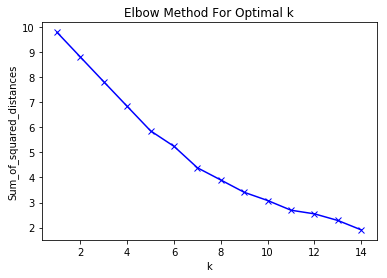

In [85]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### We see the optimum is 13 clusters.

In [ ]:
# set number of clusters
kclusters = 13

cuyahoga_grouped_clustering = cuyahoga_grouped.drop('city', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cuyahoga_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cuyahoga_merged = dfcuyahoga1

# merge cuyahoga_grouped with cuyahoga_data to add latitude/longitude for each neighborhood
cuyahoga_merged = cuyahoga_merged.join(neighborhoods_venues_sorted.set_index('city'), on='city')

cuyahoga_merged.dropna(inplace=True)
cuyahoga_merged = cuyahoga_merged.astype({"Cluster Labels": int})
cuyahoga_merged.to_csv('cuyahoga_merged.csv', index=False)
cuyahoga_merged

#### Let's map the clusters.

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cuyahoga_merged['lat'], cuyahoga_merged['lng'], cuyahoga_merged['city'], cuyahoga_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### We have an interesting finding. Category 0 has the most members it's members appear to have more pizza places and other restaurants. Let's remove category 0 and merge with median income data and see which of these is more affluent.

In [ ]:
dfcuyahoga1=dfcuyahoga.merge(cuyahoga_merged.loc[cuyahoga_merged['Cluster Labels'] != 0])
dfcuyahoga1.to_csv('dfcuyahoga1.csv', index=False)
dfcuyahoga1

#### Based on population, median income, and the amount of competition, it looks like Rocky River and Shaker Heights are good locations for our 2 gourmet pizza places. I base this on selecting the 2 cities with over $100k median income and then the highest population among those. This is based on the fact that both population and median incomes are well above the mean for Cuyahoga county. See summary statistics for our dataset below.

In [86]:
dfcuyahoga.describe()

,lat,lng,population,median_income
count,38.000000,38.000000,3.800000e+01,38.000000
mean,41.437532,-81.661145,6.702603e+04,80272.473684
std,0.073068,0.157642,2.777285e+05,30601.103512
min,41.307900,-81.931500,6.198000e+03,30466.000000
25%,41.384750,-81.811450,1.278025e+04,58252.750000
50%,41.435600,-81.628900,1.871100e+04,76732.500000
75%,41.484425,-81.522775,2.779075e+04,102062.750000
max,41.590400,-81.440100,1.731637e+06,186765.000000
